## Feature Scaling

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Scaling to quantiles and median**.

=================================================================

## Scaling to quantiles and median - RobustScaling

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

This robust scaling method produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset for the demo
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

In [4]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes
X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. 

Note that **the 75th and 25th quantiles are quite different in the different variables**.

When performing robust  absolute scaling of the data set, we need to first identify the median and quantiles of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [6]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

### RobustScaling

In [7]:
from sklearn.preprocessing import RobustScaler

In [8]:
# set up the scaler
scaler = RobustScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# the scaler stores the median values of the features as learned from train set
scaler.center_

array([ 3.53910000e+00,  2.90000000e+01,  5.22931763e+00,  1.04878049e+00,
        1.16500000e+03,  2.81635506e+00,  3.42600000e+01, -1.18490000e+02])

In [10]:
# the scaler stores the IQR values of the features as learned from train set

scaler.scale_

array([2.16550000e+00, 1.90000000e+01, 1.59537022e+00, 9.41284380e-02,
       9.40000000e+02, 8.53176853e-01, 3.78000000e+00, 3.80000000e+00])

In [11]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.15,-0.02,0.12,0.49,0.28,0.26,0.36,-0.28
std,0.87,0.66,1.43,4.81,1.22,8.05,0.57,0.53
min,-1.40,-1.47,-2.75,-7.60,-1.24,-2.42,-0.46,-1.54
25%,-0.45,-0.58,-0.49,-0.46,-0.41,-0.46,-0.09,-0.87
50%,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
75%,0.55,0.42,0.51,0.54,0.59,0.54,0.91,0.13
max,5.29,1.21,79.80,350.77,36.72,699.62,2.03,1.10


Note the median is now 0 for all variables.

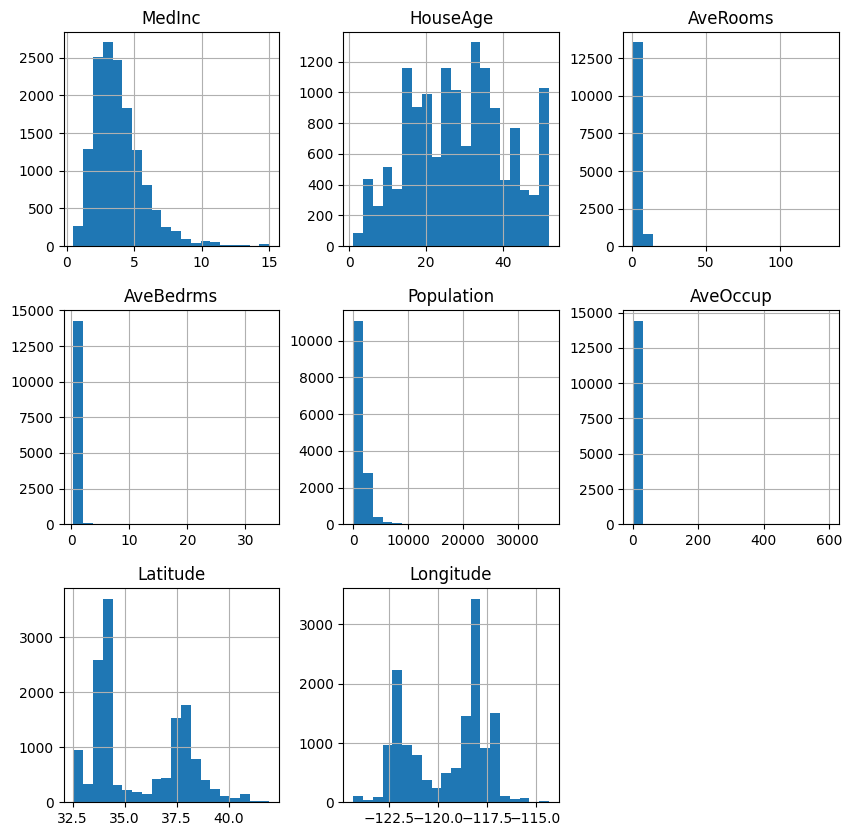

In [13]:
# Distribution before scaling:
X_train.hist(bins=20, figsize=(10,10))
plt.show()

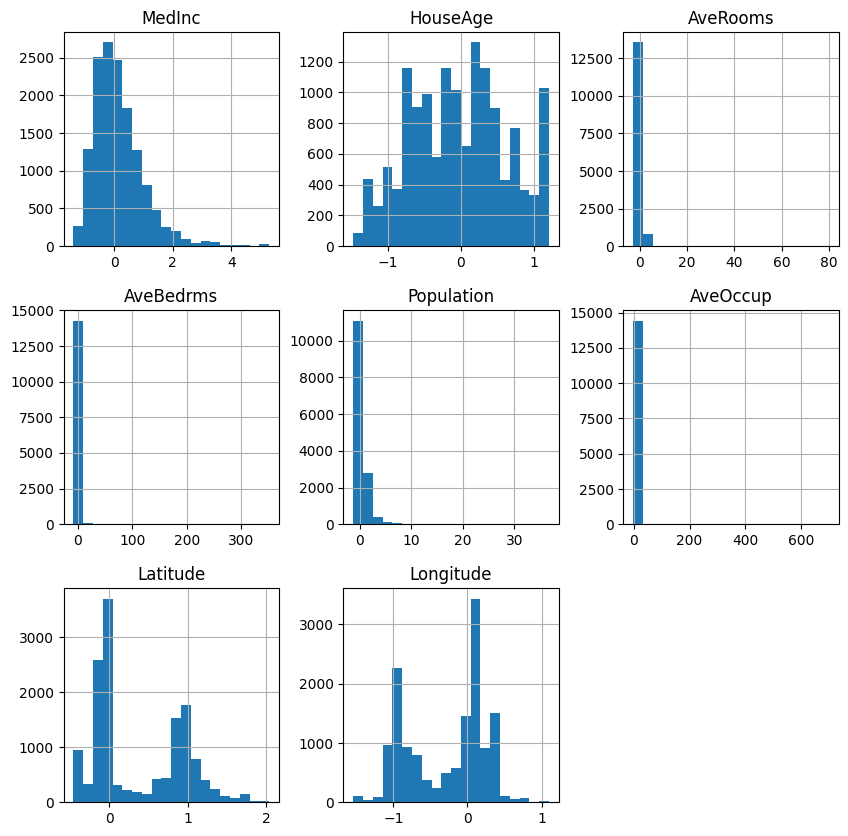

In [14]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

The variables were centered at the median values.